# Upwelling Comparison - Daily Averages

### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

### Import the necessary data, look at the general schema. The units of the upwelling data (BS & RCP) are m3/s/100m of coastline.I have done some calculations beforehand to reduce the time waiting on calculations, and saved data to excel files.

In [2]:
LandMask = xr.open_dataset('../Data Samples/NetCDF/LandMask.nc').mask[0,:,:]
maskpoints=pd.read_excel('../Data Samples/Excels/maskpointsfile.xlsx')
BS = pd.read_excel('../Data Samples/Excels/BS_ET_DayofYear_LatLonAvg.xlsx')
RCP = pd.read_excel('../Data Samples/Excels/RCP_ET_DayofYear_LatLonAvg.xlsx')
BS.head()

Year  Day      ACCESS  BCC-CSM      CCSM4  FGOALS       GFDL        IPSL  \
0  1965.0    1   83.273334      NaN  56.133768     NaN  23.175928  163.966082   
1     NaN   32   64.772030      NaN -34.897428     NaN  42.339744  -22.589407   
2     NaN   33  116.313977      NaN  44.872242     NaN  58.153057   30.736981   
3     NaN   34   95.259266      NaN  28.638805     NaN  28.192990   32.093692   
4     NaN   35   48.658305      NaN -46.723321     NaN  25.661190   46.888352   

   MIROC5         MPI        MRI  NorESM  
0     NaN   34.026026  60.089862     NaN  
1     NaN   90.276421 -64.511374     NaN  
2     NaN   83.616036 -23.618687     NaN  
3     NaN  176.097610   7.438818     NaN  
4     NaN  179.194285  52.510517     NaN

#### Schema is Year, Day, and 10 Model Ensemble. Forward fill the years and group the index by year and day.

In [3]:
BS[['Year']] = BS[['Year']].ffill()
BS.set_index(['Year', 'Day'], inplace=True)
RCP[['Year']] = RCP[['Year']].ffill()
RCP.set_index(['Year', 'Day'], inplace=True)
RCP = RCP.loc[2010:2050]
BS.head()

ACCESS  BCC-CSM      CCSM4  FGOALS       GFDL        IPSL  \
Year   Day                                                                  
1965.0 1     83.273334      NaN  56.133768     NaN  23.175928  163.966082   
       32    64.772030      NaN -34.897428     NaN  42.339744  -22.589407   
       33   116.313977      NaN  44.872242     NaN  58.153057   30.736981   
       34    95.259266      NaN  28.638805     NaN  28.192990   32.093692   
       35    48.658305      NaN -46.723321     NaN  25.661190   46.888352   

            MIROC5         MPI        MRI  NorESM  
Year   Day                                         
1965.0 1       NaN   34.026026  60.089862     NaN  
       32      NaN   90.276421 -64.511374     NaN  
       33      NaN   83.616036 -23.618687     NaN  
       34      NaN  176.097610   7.438818     NaN  
       35      NaN  179.194285  52.510517     NaN

# Plotting

### Set the desired models for plotting in the "models" variable below. See column headers above for potential model names.

### The following plots will show each models daily average upwelling volume for each year for the Historical (1965-2005, Blue) and Future (2010-2050, Red), as well as the averages across both time periods (thick lines).

In [4]:
# Example:
models = ['ACCESS', 'BCC-CSM', 'CCSM4','FGOALS', 'GFDL', 'IPSL', 'MIROC5', 'MPI', 'NorESM']

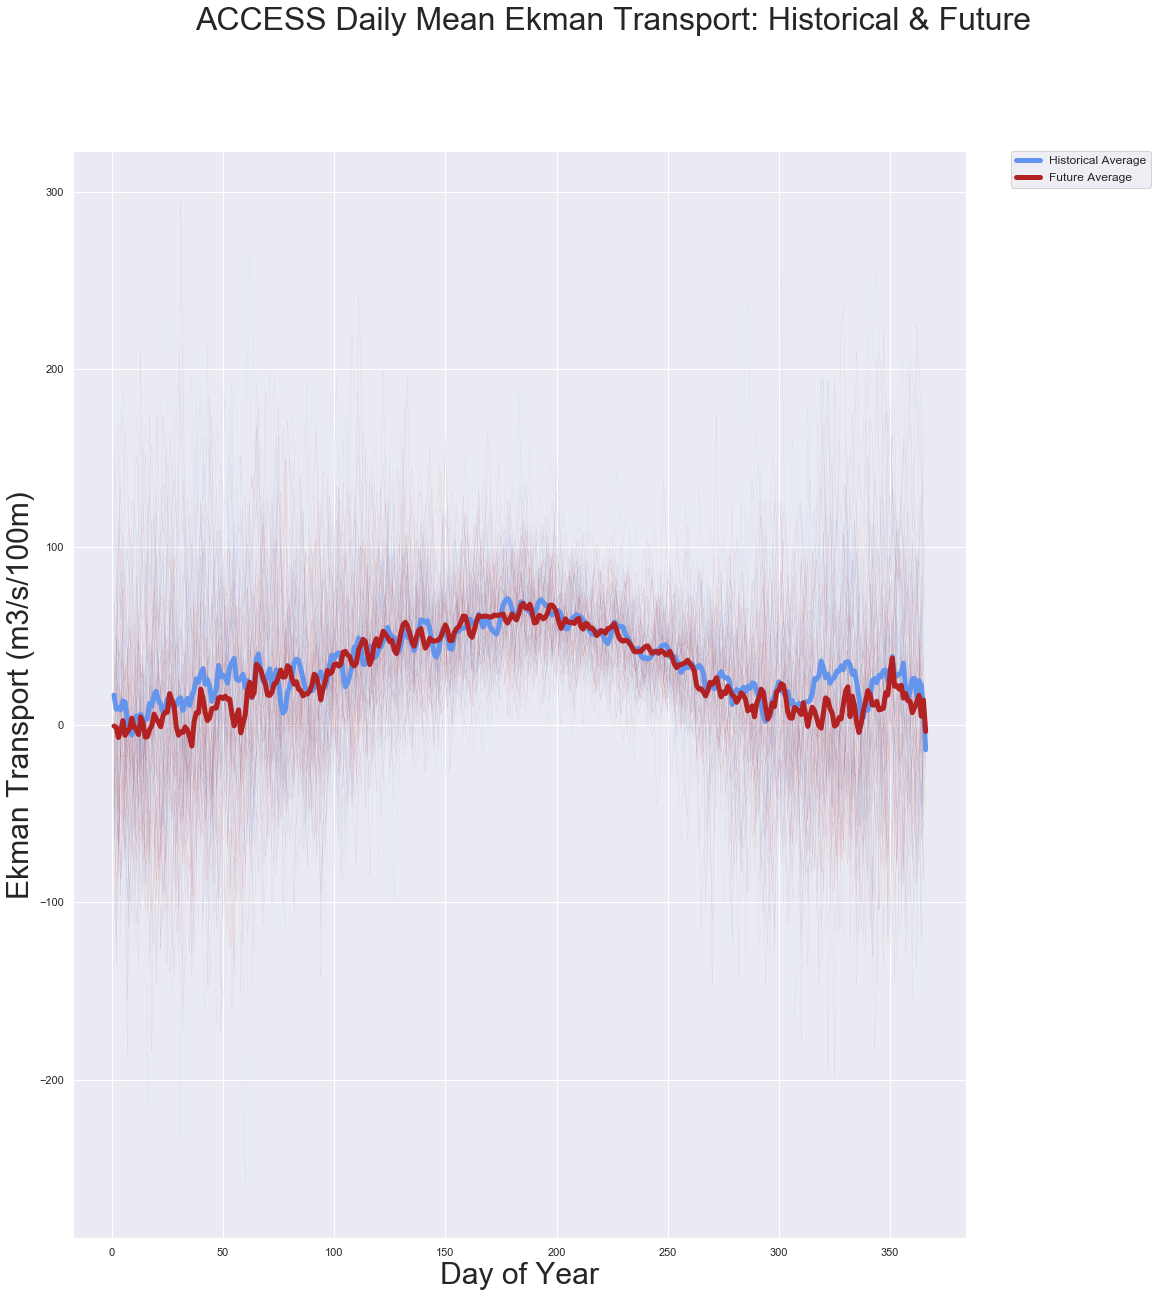

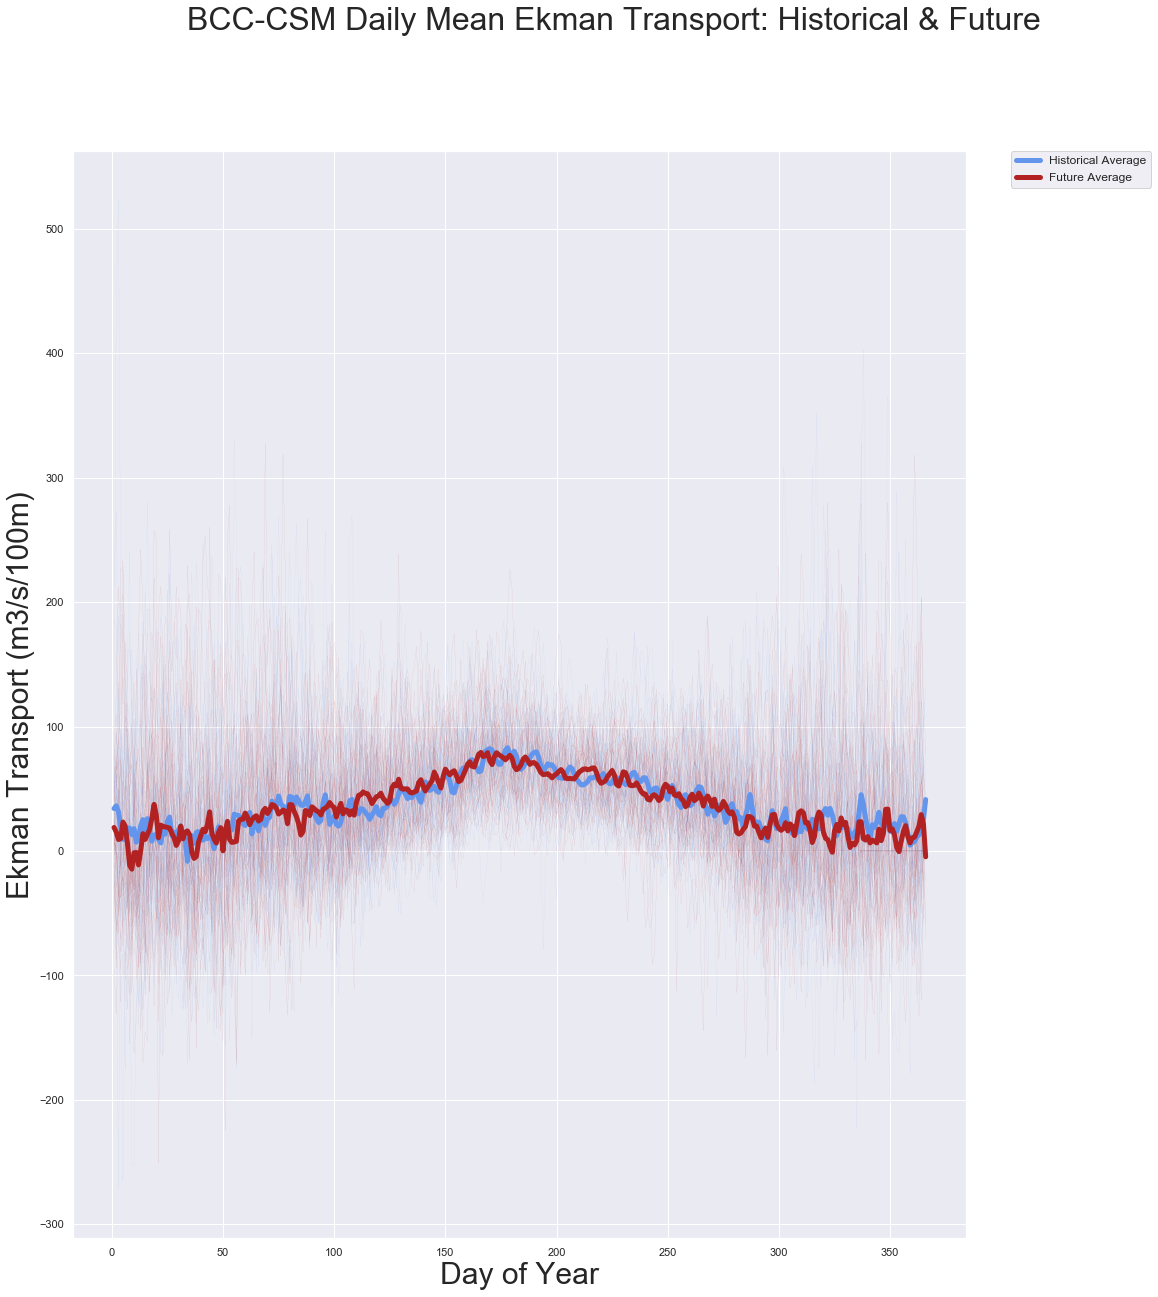

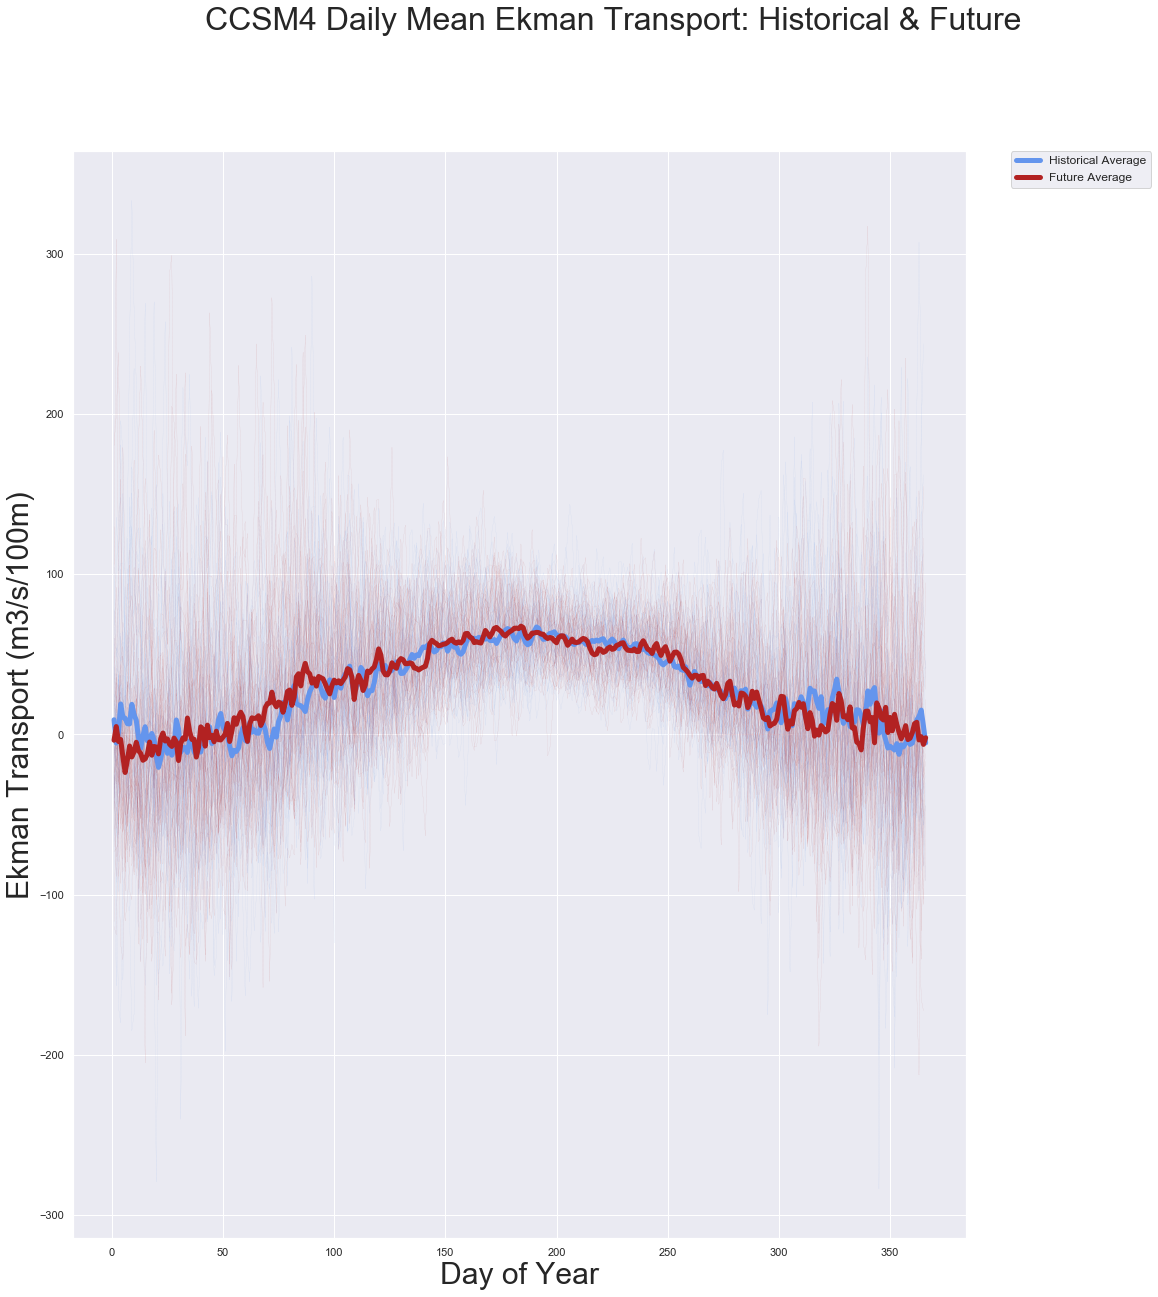

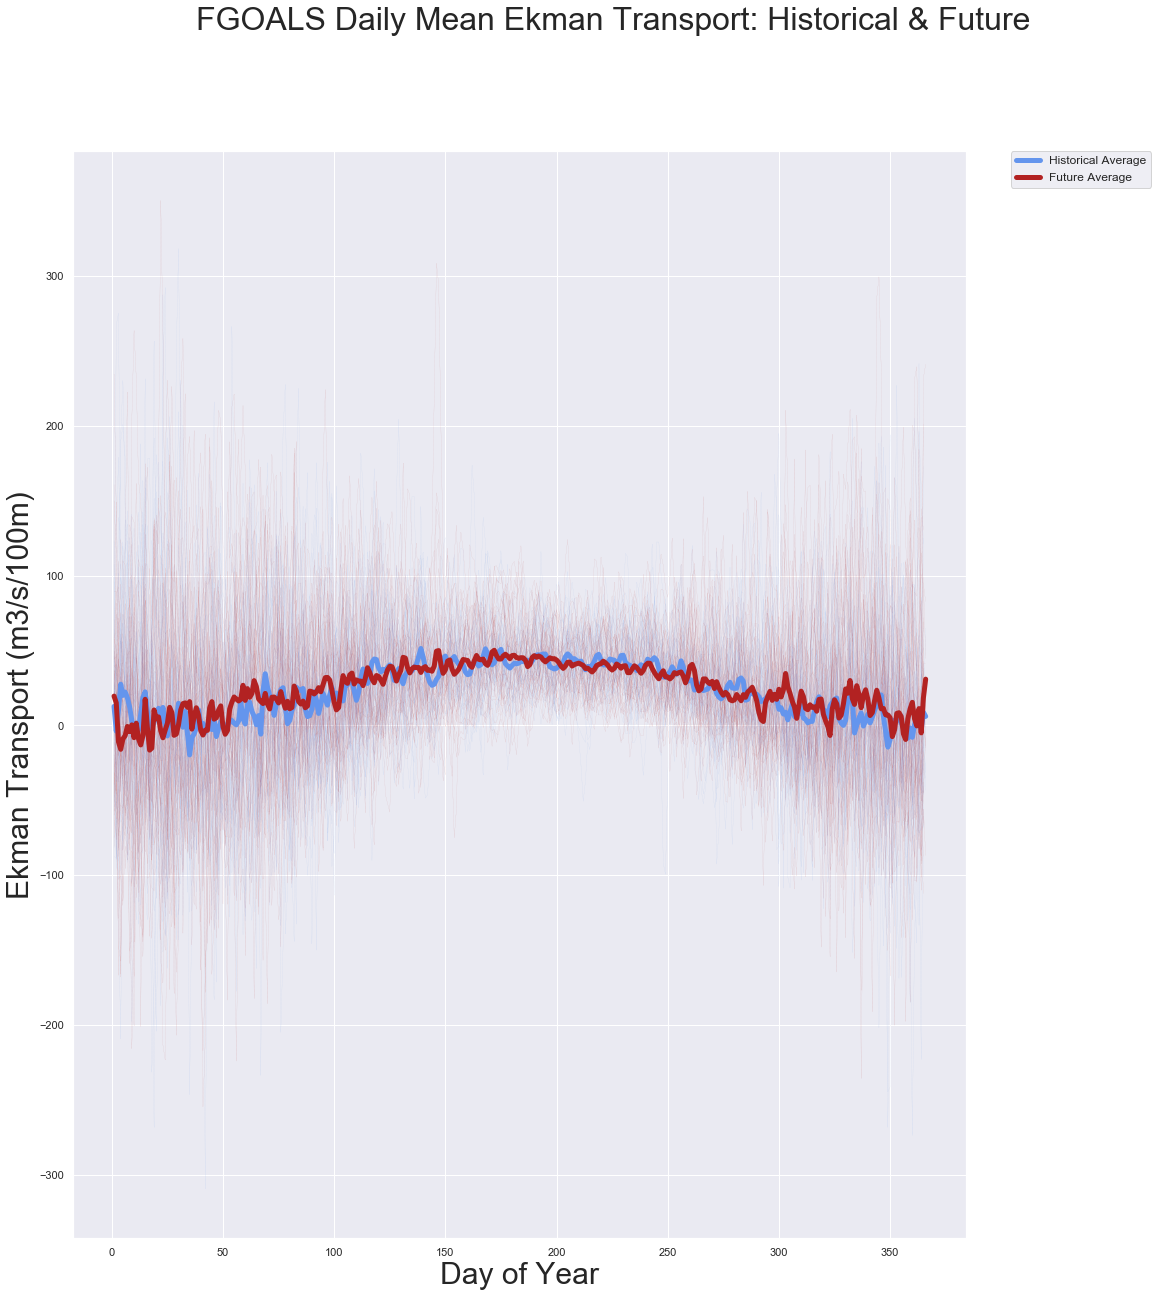

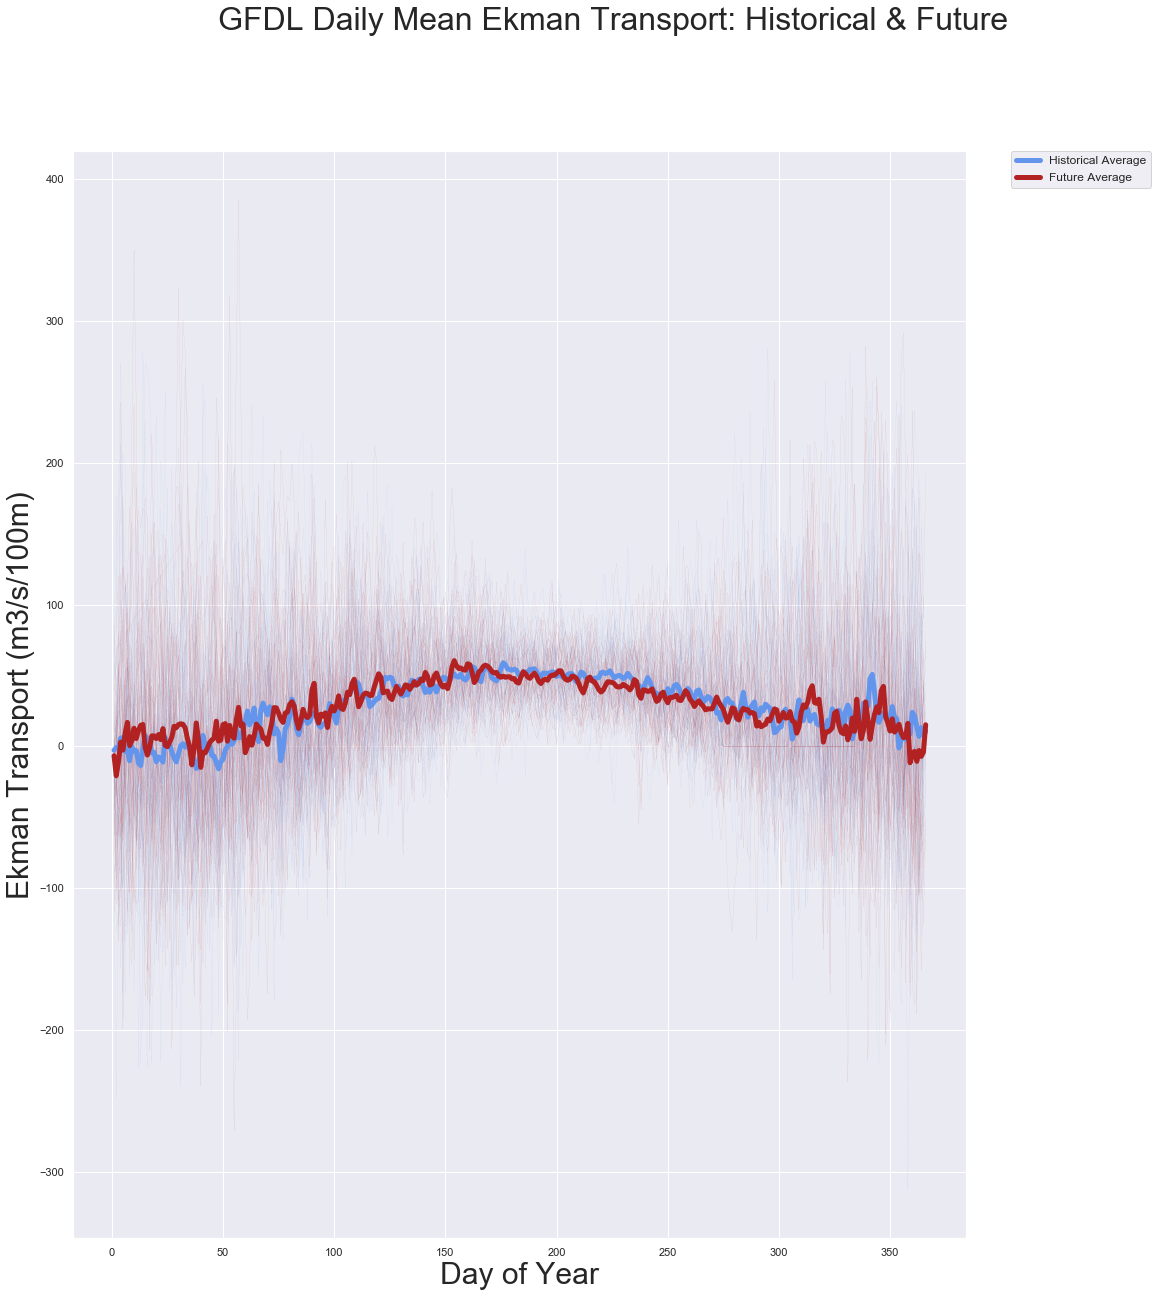

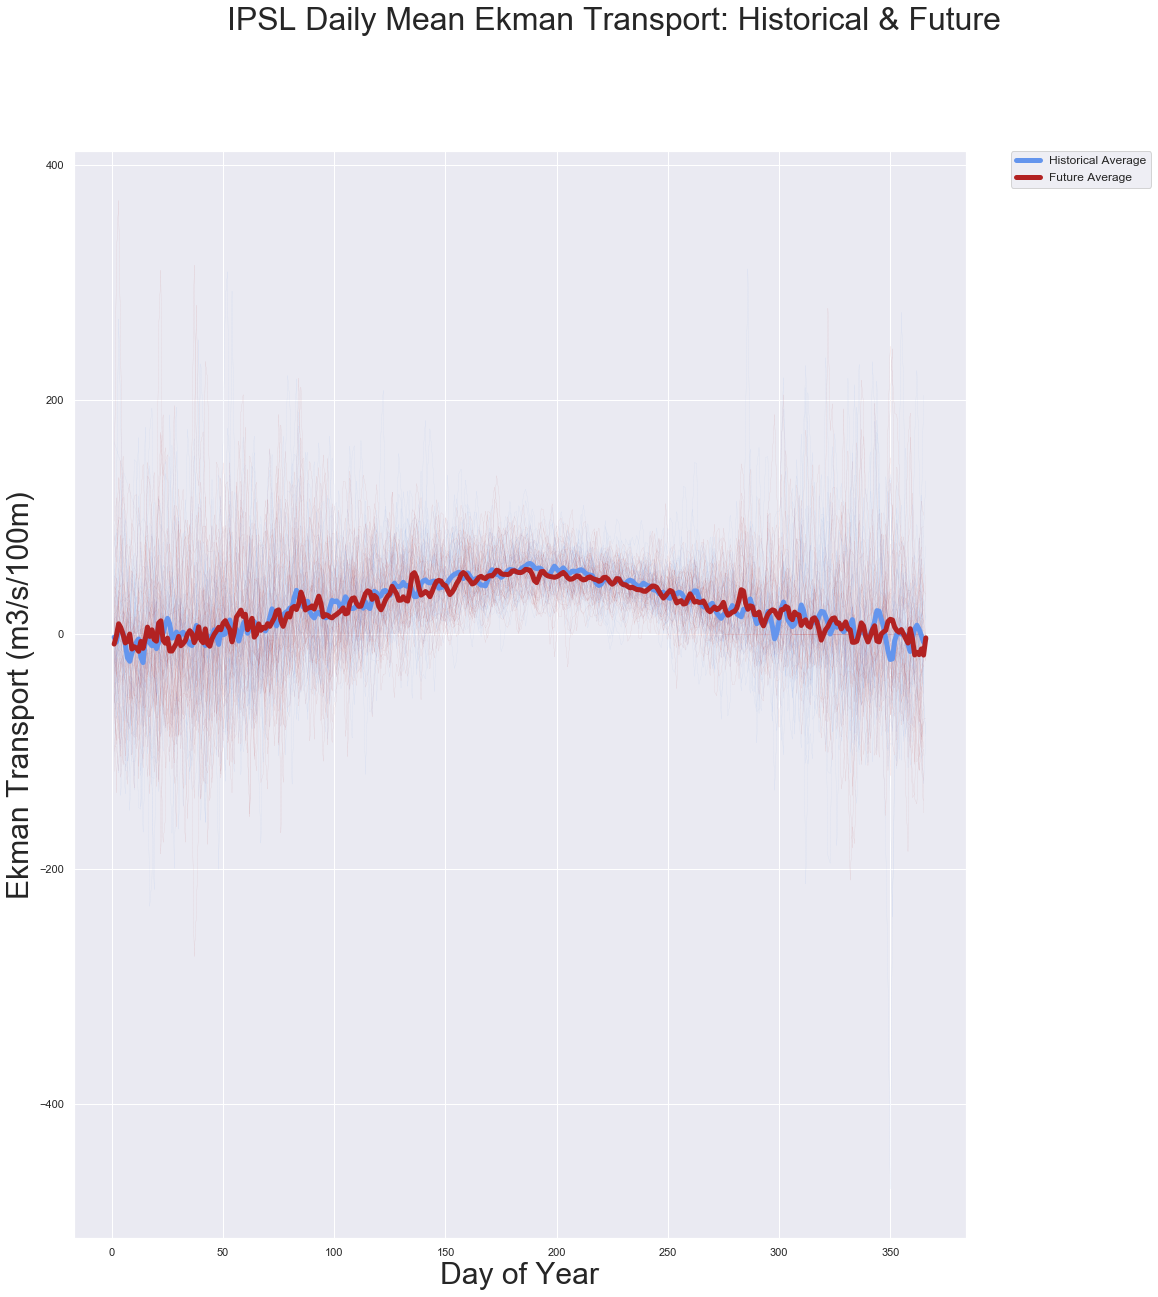

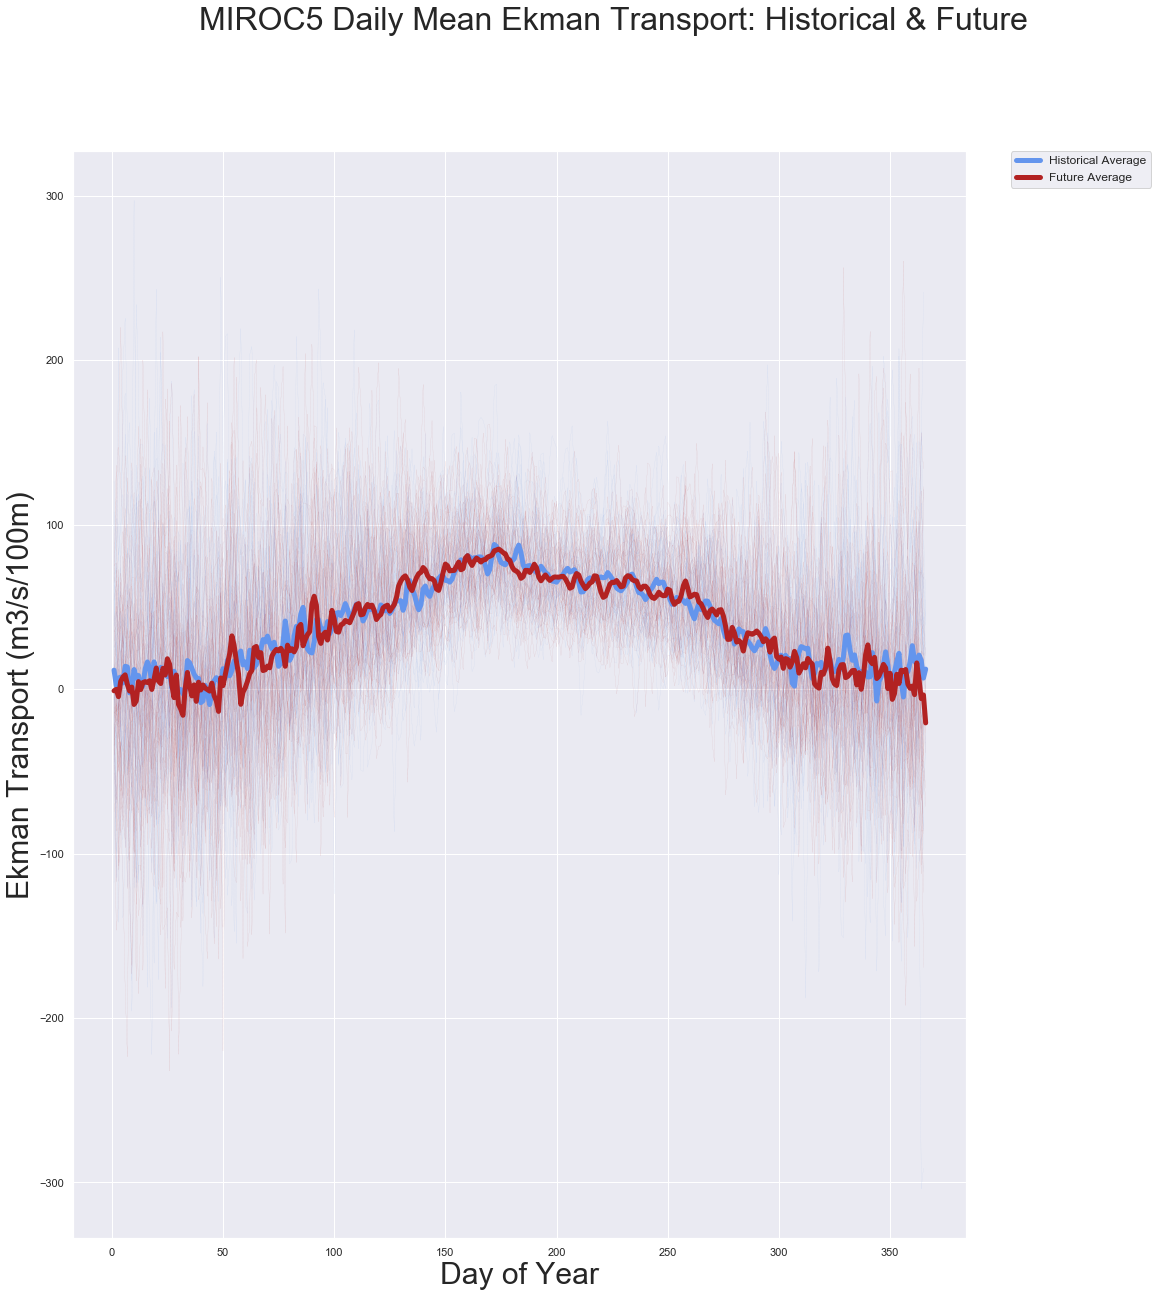

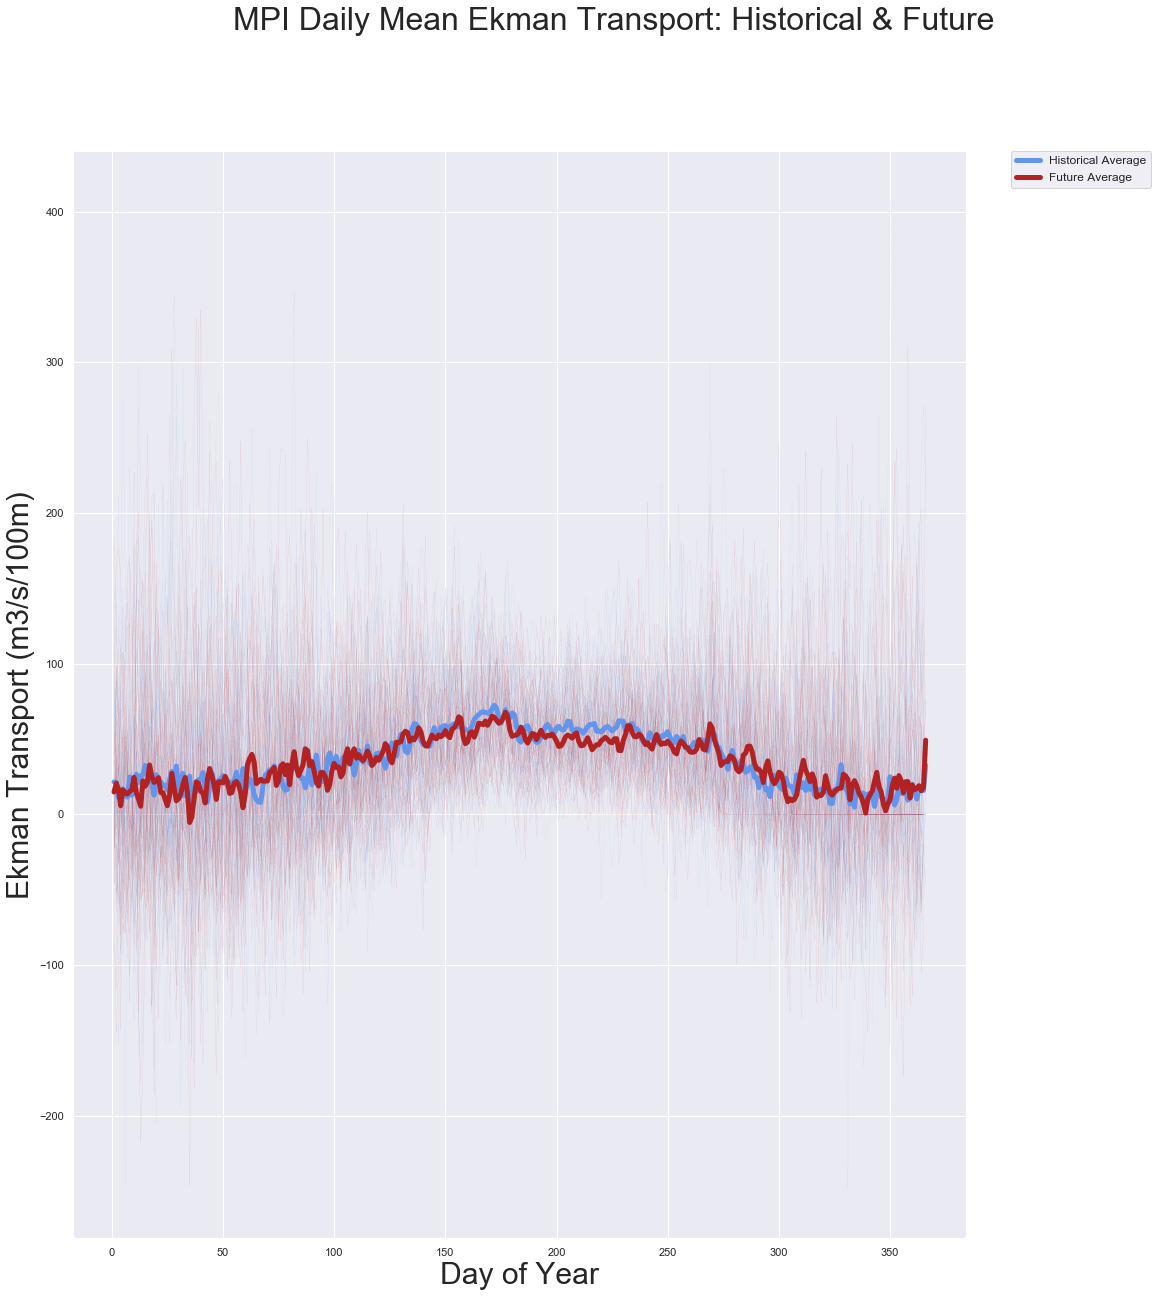

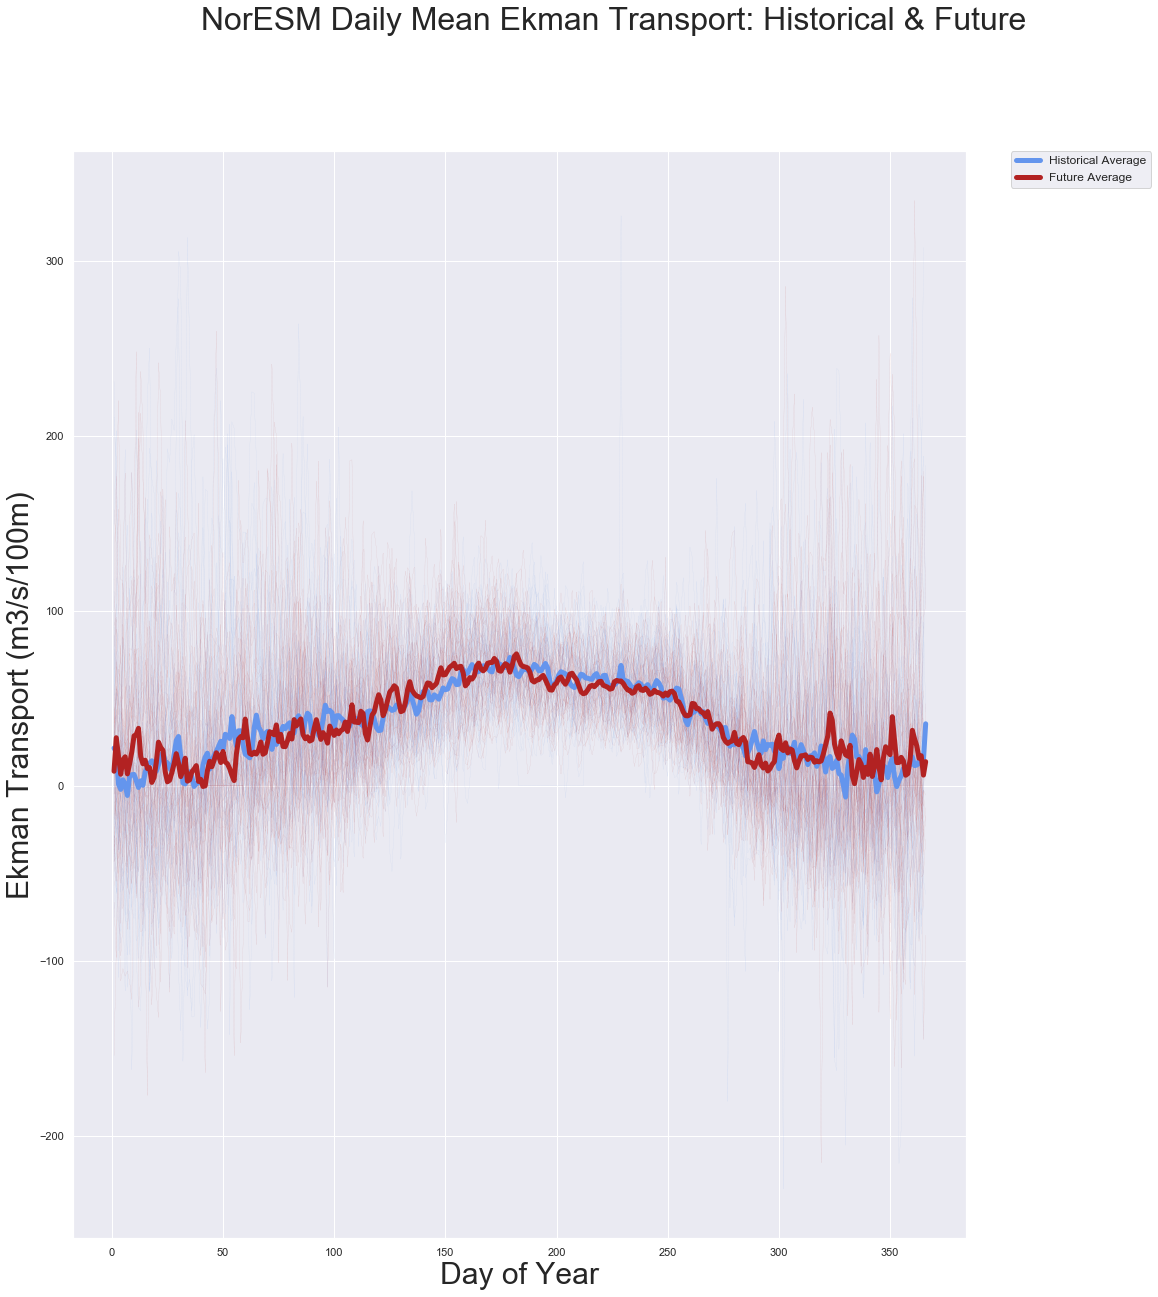

In [5]:
for model in models:
    model_df = BS.loc[:, model]
    Year = 1965
    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(111)
    while Year <=2005:
        year_df = model_df.loc[Year]
        plot = ax1.plot(year_df, linewidth=0.1, label="_nolegend_", color='cornflowerblue', linestyle=':')
        Year+=1
    total_ensemble_BS = model_df.groupby('Day').mean()
    
    model_df = RCP.loc[:, model]
    Year = 2010
    while Year <=2050:
        year_df = model_df.loc[Year]
        plot = ax1.plot(year_df, linewidth=0.1, label="_nolegend_", color='firebrick', linestyle=':')
        Year+=1
    total_ensemble_RCP = model_df.groupby('Day').mean()
    plot = ax1.plot(total_ensemble_BS, linewidth=5.0, label='Historical Average', color='cornflowerblue')
    plot = ax1.plot(total_ensemble_RCP, linewidth=5.0, label='Future Average',color='firebrick')
    fig.suptitle('{} Daily Mean Ekman Transport: Historical & Future'.format(model), fontsize=32)
    leg=ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize=12)
    xlabel = ax1.set_xlabel('Day of Year', fontsize=30)
    ylabel = ax1.set_ylabel('Ekman Transport (m3/s/100m)', fontsize=30)
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

### The following block creates an average over all models (aka "ensemble average"). Generate the Mann-Whitney U Statistic, P value, and effective size to determine the statistical significance of the difference between the two datasets.

U statistic   p Value  Effective Size
Stats      64467.0  0.190069         0.03749

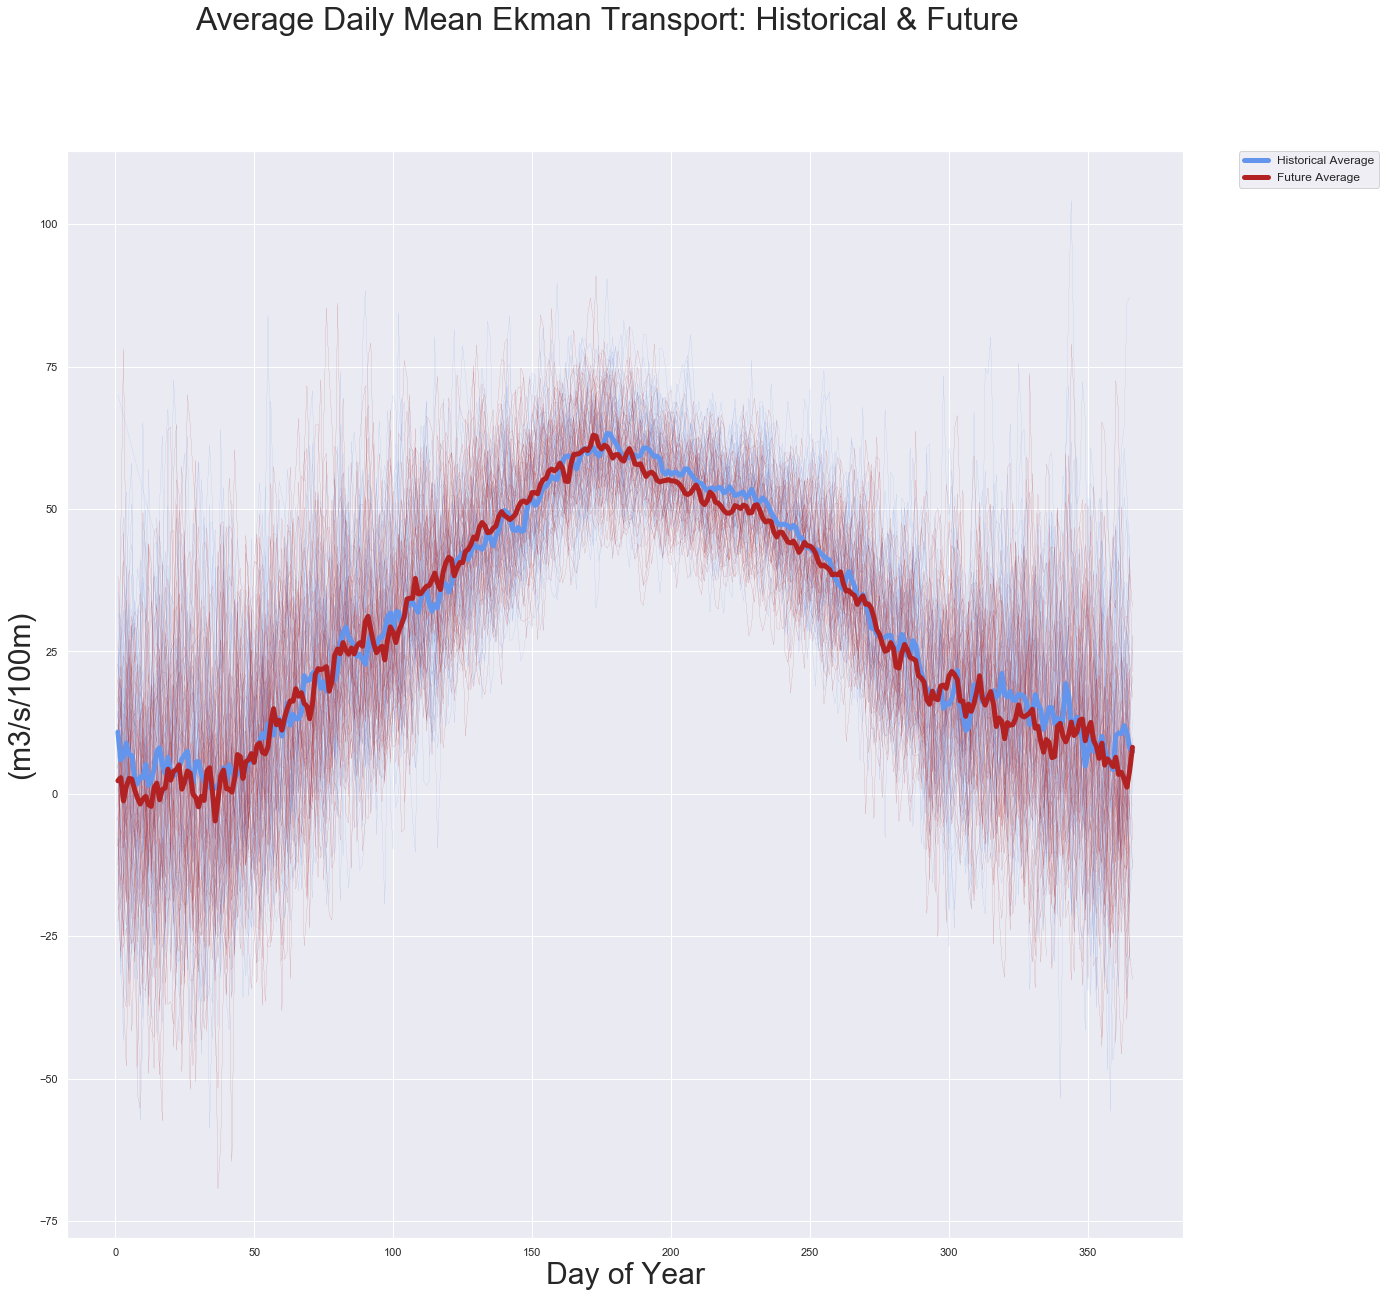

In [6]:
import scipy.stats as stats
Year = 1965
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(111)
while Year <=2005:
    year_df = BS.loc[Year].mean(axis=1)
    plot = ax1.plot(year_df, linewidth=0.1, label='__nolabel__',color='cornflowerblue')
    Year+=1

Year = 2010
while Year <=2050:
    year_df = RCP.loc[Year].mean(axis=1)
    plot = ax1.plot(year_df, linewidth=0.1,label='__nolabel__', color='firebrick')
    Year+=1

total_ensemble_BS = BS.groupby('Day').mean().mean(axis=1)
plot = ax1.plot(total_ensemble_BS, linewidth=5.0, label='Historical Average',color='cornflowerblue')
total_ensemble_RCP = RCP.groupby('Day').mean().mean(axis=1)
plot = ax1.plot(total_ensemble_RCP, linewidth=5.0, label='Future Average',color='firebrick')
fig.suptitle('Average Daily Mean Ekman Transport: Historical & Future', fontsize=32)
ax1.set_xlabel('Day of Year', fontsize=30)
ax1.set_ylabel('(m3/s/100m)', fontsize=30)
leg=ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize=12)


na = len(total_ensemble_BS)
nb = len(total_ensemble_RCP)
U, p = stats.mannwhitneyu(total_ensemble_BS, total_ensemble_RCP)
r = 1-(2*U)/(na*nb)
stats =  pd.DataFrame([[U,p,r]], columns=['U statistic', 'p Value', 'Effective Size'], index=['Stats'])
stats